In [250]:
import psycopg2
import requests
import pandas as pd
from retentioneering import init_config
from psycopg2.extras import RealDictCursor

### Connect to database to get access to trajectories

In [251]:
conn = psycopg2.connect(
    database='reboard-api',
    host='176.112.192.94',
    user='postgres',
    password='postgres',
    cursor_factory=RealDictCursor
)

def query(q):
    with conn:
        with conn.cursor() as cur:
            cur.execute(q)
            res = cur.fetchall()
    return pd.DataFrame(res)

In [252]:
#import trajectories from reboard:

data_full = query(f"""
    select
        ge_timestamp_event as event_timestamp,
        ge_session_id as user_pseudo_id,
        ge_event_name as event_name
    from pixel.game_event
    order by event_timestamp
""")

In [253]:
len(data_full)

2697

# 1. Work with single trajectories

To get your unique game id:

    1.Open reboardgame.com
    2.Open browser console (usually you can click F12)
    3.Execute in console following command
    
    localStorage.getItem('reboard_session_id')

### one user example:

In [254]:
# if you want to select only your trajectory
# put here your user_id
user_id = "1563292912265|1"

# this will show your events
data = data_full[data_full.user_pseudo_id == user_id]
data.head(100)

,event_name,event_timestamp,user_pseudo_id
1502,tech_screen_change_mainmenu,2019-07-16 16:01:52,1563292912265|1
1503,tech_screen_change_settings,2019-07-16 16:02:19,1563292912265|1
1504,pregame_change_settings,2019-07-16 16:02:23,1563292912265|1
1505,pregame_change_settings,2019-07-16 16:02:24,1563292912265|1
1506,tech_screen_change_mainmenu,2019-07-16 16:02:25,1563292912265|1
1507,pregame_start_game,2019-07-16 16:02:27,1563292912265|1
1508,tech_screen_change_gameplay,2019-07-16 16:02:27,1563292912265|1
1509,game_board_click,2019-07-16 16:02:29,1563292912265|1
1510,game_board_click,2019-07-16 16:02:30,1563292912265|1
1511,game_board_click,2019-07-16 16:02:31,1563292912265|1


In [255]:
 init_config(
    experiments_folder='experiments', 
     
    index_col='user_pseudo_id',
    event_col='event_name', 
    event_time_col='event_timestamp', 
    
    positive_target_event='', 
    negative_target_event='', 
    
    pos_target_definition={},
    neg_target_definition={},
)

/anaconda3/lib/python3.7/site-packages/retentioneering/core/utils.py:59: UserWarning: registration of accessor <class 'retentioneering.core.utils.init_config.<locals>.RetentioneeringTrajectory'> under name 'trajectory' for type <class 'pandas.core.frame.DataFrame'> is overriding a preexisting attribute with the same name.
  class RetentioneeringTrajectory(BaseTrajectory):
/anaconda3/lib/python3.7/site-packages/retentioneering/core/utils.py:66: UserWarning: registration of accessor <class 'retentioneering.core.utils.init_config.<locals>.RetentioneeringDataset'> under name 'retention' for type <class 'pandas.core.frame.DataFrame'> is overriding a preexisting attribute with the same name.
  class RetentioneeringDataset(BaseDataset):


In [256]:
data = data.retention.prepare()

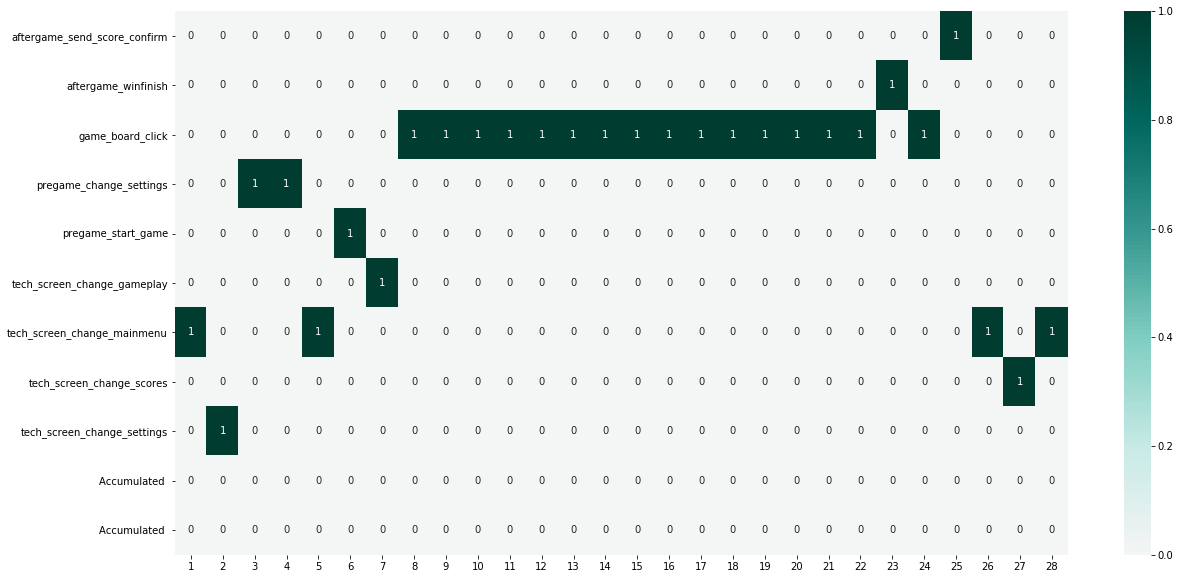

In [258]:
desc_table = data.retention.get_step_matrix(max_steps=30)

In [257]:
data.retention.plot_graph(thresh=0.05, width=800, height=800)

### user example 2:

In [259]:
# if you want to select only your trajectory
# put here your user_id
user_id = "1563294644872|1"

# this will show your events
data = data_full[data_full.user_pseudo_id == user_id]
data.head(100)

,event_name,event_timestamp,user_pseudo_id
1543,tech_screen_change_mainmenu,2019-07-16 16:30:44,1563294644872|1
1544,tech_screen_change_settings,2019-07-16 16:31:04,1563294644872|1
1545,pregame_change_settings,2019-07-16 16:31:05,1563294644872|1
1546,tech_screen_change_mainmenu,2019-07-16 16:31:06,1563294644872|1
1547,tech_screen_change_scores,2019-07-16 16:31:08,1563294644872|1
1548,tech_screen_change_mainmenu,2019-07-16 16:31:12,1563294644872|1


In [260]:
 init_config(
    experiments_folder='experiments', 
     
    index_col='user_pseudo_id',
    event_col='event_name', 
    event_time_col='event_timestamp', 
    
    positive_target_event='', 
    negative_target_event='', 
    
    pos_target_definition={},
    neg_target_definition={},
)

/anaconda3/lib/python3.7/site-packages/retentioneering/core/utils.py:59: UserWarning: registration of accessor <class 'retentioneering.core.utils.init_config.<locals>.RetentioneeringTrajectory'> under name 'trajectory' for type <class 'pandas.core.frame.DataFrame'> is overriding a preexisting attribute with the same name.
  class RetentioneeringTrajectory(BaseTrajectory):
/anaconda3/lib/python3.7/site-packages/retentioneering/core/utils.py:66: UserWarning: registration of accessor <class 'retentioneering.core.utils.init_config.<locals>.RetentioneeringDataset'> under name 'retention' for type <class 'pandas.core.frame.DataFrame'> is overriding a preexisting attribute with the same name.
  class RetentioneeringDataset(BaseDataset):


In [261]:
data = data.retention.prepare()

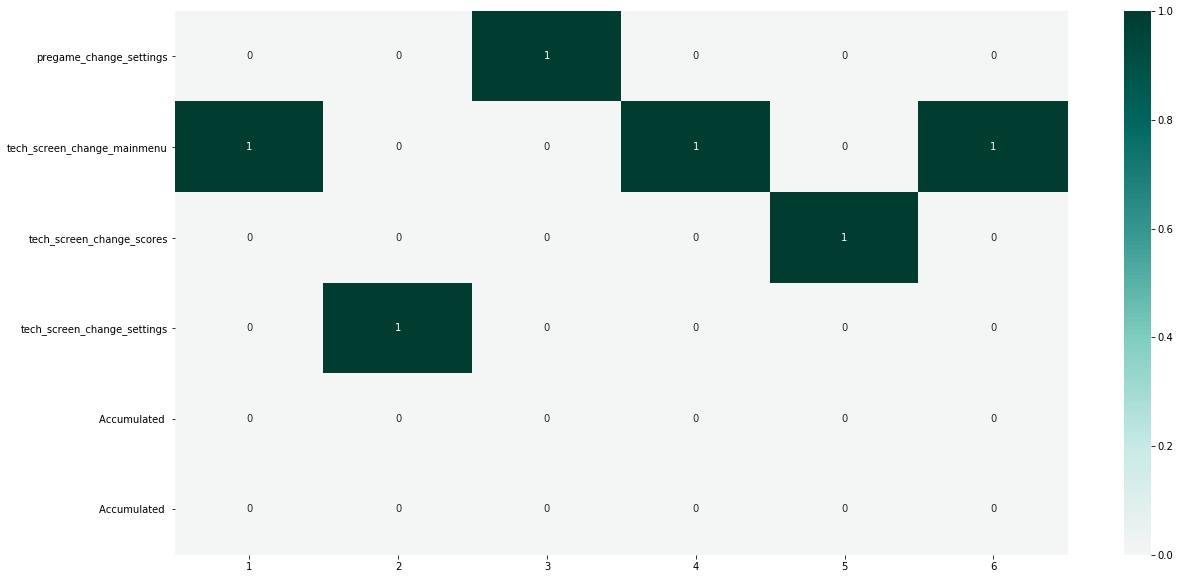

In [262]:
desc_table = data.retention.get_step_matrix(max_steps=30)

In [263]:
data.retention.plot_graph(thresh=0.05, width=800, height=800)

# 2. Basic instruments to work with trajectories set

In [264]:
init_config(
    experiments_folder='experiments', # folder for saving experiment results: graph visualization, heatmaps and etc.
    index_col='user_pseudo_id', # column by which we split users / sessions / whatever
    event_col='event_name', # column that describes event
    event_time_col='event_timestamp', # column that describes timestamp of event
    
    #let's pick positive event as sending the score (only available after game completed)
    positive_target_event='aftergame_send_score_confirm', # name of positive target event
    negative_target_event='lost', # name of negative target event
    
    pos_target_definition={ # how to define positive event, e.g. empty means that add passed for whom was not 'lost'
        
    },
    neg_target_definition={ # how to define negative event
        #emply means all that are not positive will be "lost"
    },
)

/anaconda3/lib/python3.7/site-packages/retentioneering/core/utils.py:59: UserWarning: registration of accessor <class 'retentioneering.core.utils.init_config.<locals>.RetentioneeringTrajectory'> under name 'trajectory' for type <class 'pandas.core.frame.DataFrame'> is overriding a preexisting attribute with the same name.
  class RetentioneeringTrajectory(BaseTrajectory):
/anaconda3/lib/python3.7/site-packages/retentioneering/core/utils.py:66: UserWarning: registration of accessor <class 'retentioneering.core.utils.init_config.<locals>.RetentioneeringDataset'> under name 'retention' for type <class 'pandas.core.frame.DataFrame'> is overriding a preexisting attribute with the same name.
  class RetentioneeringDataset(BaseDataset):


In [265]:
user_set = ["1563292912265|1","1563294644872|1"]
data = data_full[data_full.apply(lambda x: x['user_pseudo_id'] in user_set, axis=1)]

In [266]:
data = data.retention.prepare()

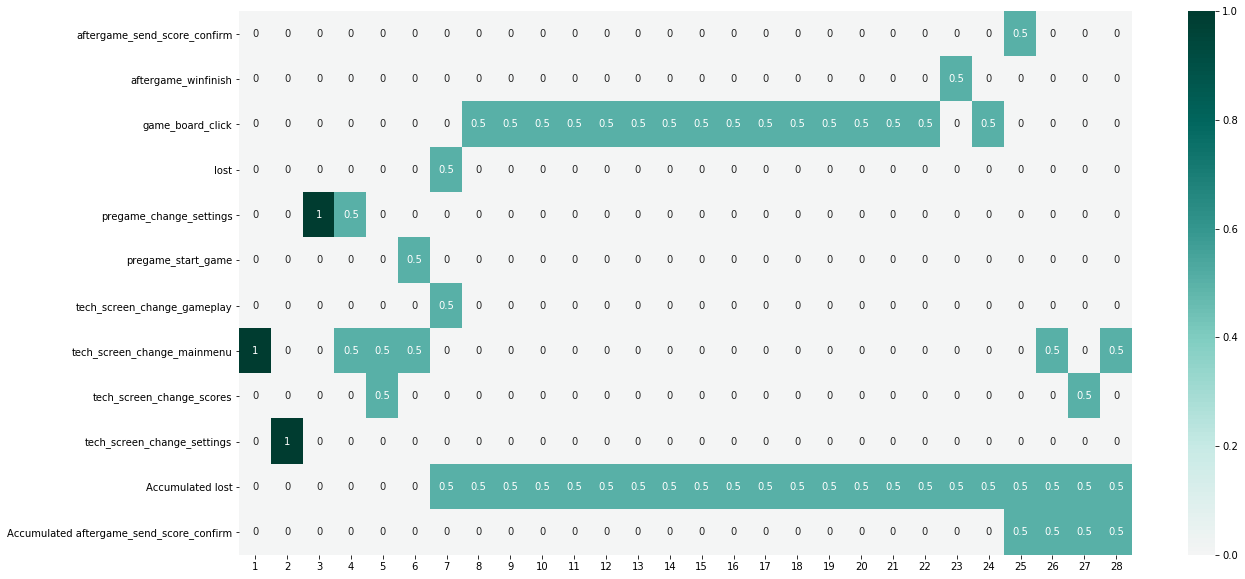

In [267]:
desc_table = data.retention.get_step_matrix(max_steps=30)

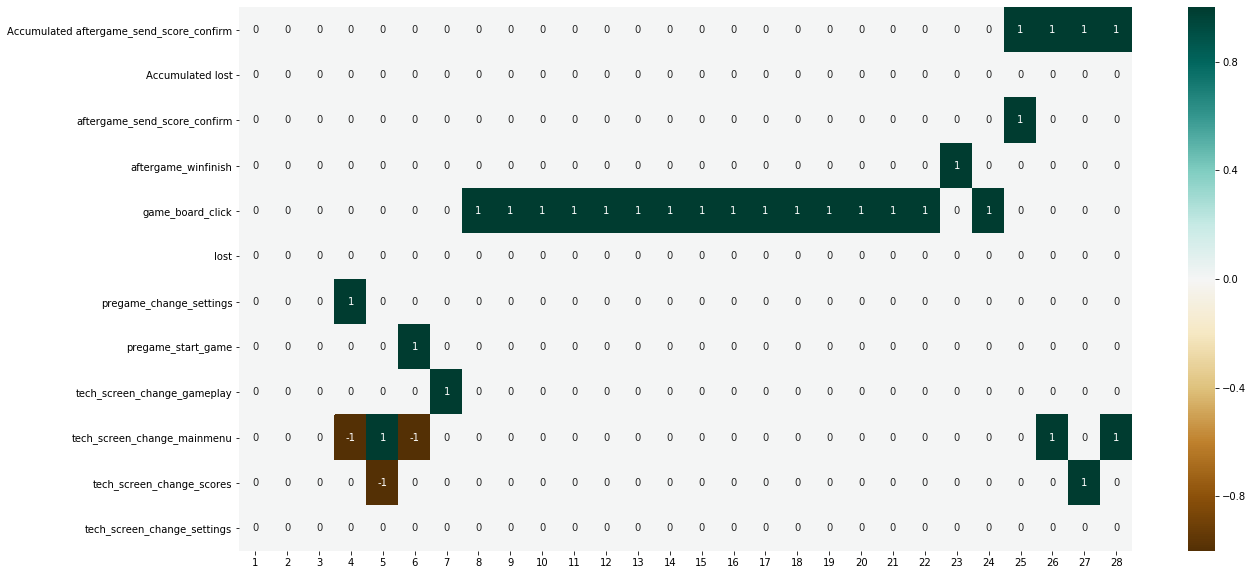

In [268]:
# create group filter based on target events
diff_filter = data.retention.create_filter()

# calculate difference table between two groups
diff_table = data.retention.get_step_matrix_difference(diff_filter, max_steps=30)

In [33]:
data.retention.plot_graph(thresh=0.05, width=800, height=800)

# 3. Inspect all trajectories for larger group of users

In [269]:
# 
init_config(
    experiments_folder='experiments', # folder for saving experiment results: graph visualization, heatmaps and etc.
    index_col='user_pseudo_id', # column by which we split users / sessions / whatever
    event_col='event_name', # column that describes event
    event_time_col='event_timestamp', # column that describes timestamp of event
    
    #let's pick positive event as sending the score (only available after game completed)
    positive_target_event='aftergame_send_score_confirm', # name of positive target event
    negative_target_event='lost', # name of negative target event
    
    pos_target_definition={ # how to define positive event, e.g. empty means that add passed for whom was not 'lost'
        
    },
    neg_target_definition={ # how to define negative event
        #emply means all that are not positive will be "lost"
    },
)

/anaconda3/lib/python3.7/site-packages/retentioneering/core/utils.py:59: UserWarning: registration of accessor <class 'retentioneering.core.utils.init_config.<locals>.RetentioneeringTrajectory'> under name 'trajectory' for type <class 'pandas.core.frame.DataFrame'> is overriding a preexisting attribute with the same name.
  class RetentioneeringTrajectory(BaseTrajectory):
/anaconda3/lib/python3.7/site-packages/retentioneering/core/utils.py:66: UserWarning: registration of accessor <class 'retentioneering.core.utils.init_config.<locals>.RetentioneeringDataset'> under name 'retention' for type <class 'pandas.core.frame.DataFrame'> is overriding a preexisting attribute with the same name.
  class RetentioneeringDataset(BaseDataset):


In [270]:
data = data_full[data_full['event_timestamp'] < '2019-07-17 11:00:00']

In [271]:
data = data.retention.prepare()

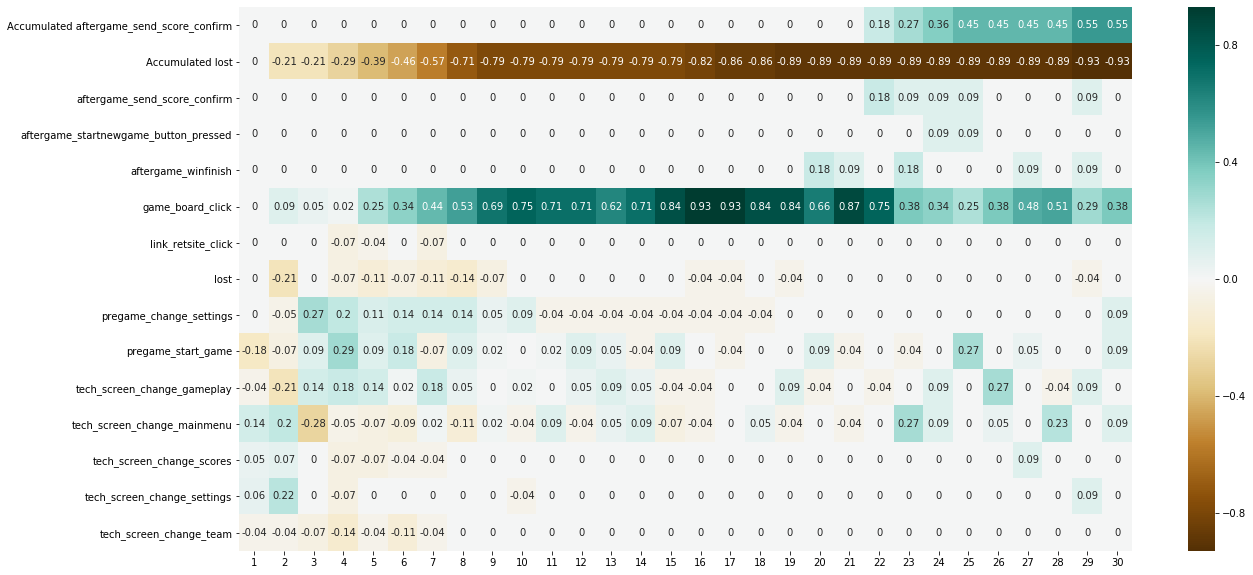

In [272]:
# create group filter based on target events
diff_filter = data.retention.create_filter()

# calculate difference table between two groups
diff_table = data.retention.get_step_matrix_difference(diff_filter, max_steps=30)

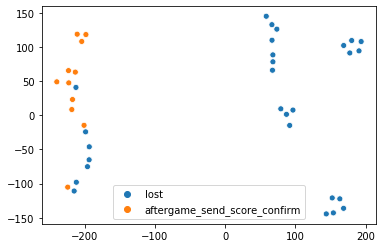

In [273]:
data.retention.learn_tsne(perplexity=3, plot_type='targets', refit=True);

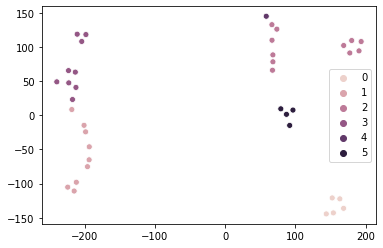

In [274]:
data.retention.get_clusters(n_clusters=6, plot_type='cluster_tsne', refit_cluster=True);

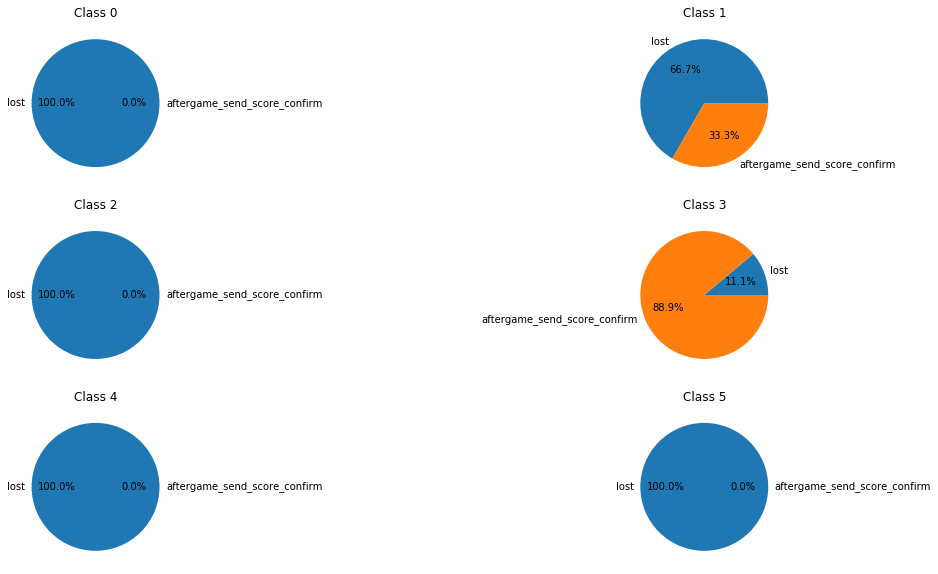

In [243]:
data.retention.get_clusters(plot_type='cluster_pie',plot_cnt=6);

In [232]:
(data
 .retention
 .filter_cluster(0)
 .retention
 .plot_graph(width=800, height=800, thresh=0.1))

/anaconda3/lib/python3.7/site-packages/networkx/drawing/layout.py:923: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
  pos = np.row_stack((pos[x] for x in node_list))


In [233]:
(data
 .retention
 .filter_cluster(1)
 .retention
 .plot_graph(width=800, height=800, thresh=0.17))

In [234]:
(data
 .retention
 .filter_cluster(2)
 .retention
 .plot_graph(width=800, height=800, thresh=0.05))

In [237]:
(data
 .retention
 .filter_cluster(5)
 .retention
 .plot_graph(width=800, height=800))

# 4. Teach ML classifier based on user trajectories

In [275]:
model = data.retention.create_model()

/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [276]:
features = data.retention.extract_features(ngram_range=(1,2))
target = features.index.isin(data.retention.get_positive_users())

In [278]:
model.permutation_importance(features, target, thresh=0.)


            ROC-AUC: 0.9707792207792207
            PR-AUC: 0.9008736213281667
            Accuracy: 0.9230769230769231
            


# apply classifier to individual user trajectory

In [ ]:
#import trajectories from reboard:

data_full = query(f"""
    select
        ge_timestamp_event as event_timestamp,
        ge_session_id as user_pseudo_id,
        ge_event_name as event_name
    from pixel.game_event
    order by event_timestamp
""")

In [19]:
# if you want to select only your trajectory
# put here your user_id
user_id = '1563292912265|1'

# this will show your events
data_test = data_full[data_full.user_pseudo_id == user_id]
data_test.head(100)

,event_name,event_timestamp,user_pseudo_id
11515,tech_screen_change_mainmenu,2019-07-16 10:08:31,1563271711666|1
11516,tech_screen_change_settings,2019-07-16 10:12:44,1563271711666|1
11517,tech_screen_change_mainmenu,2019-07-16 10:12:45,1563271711666|1
11518,tech_screen_change_scores,2019-07-16 10:29:28,1563271711666|1
11519,tech_screen_change_mainmenu,2019-07-16 10:29:41,1563271711666|1


In [20]:
data_test = data_test.retention.prepare()

In [21]:
# parameter wo_last_k - how many steps in advance you want to predict
features_test = data.retention.extract_features_from_test(data_test, ngram_range=(1,2),wo_last_k=0)

# add targets to test
target = features_test.index.isin(data_test.retention.get_positive_users())

/Users/anatolyzaytsev/.local/lib/python3.7/site-packages/pandas-0.24.2-py3.7-macosx-10.9-x86_64.egg/pandas/core/indexing.py:1494: FutureWarning: 
Passing list-likes to .loc or [] with any missing label will raise
KeyError in the future, you can use .reindex() as an alternative.

See the documentation here:
https://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate-loc-reindex-listlike
  return self._getitem_tuple(key)


In [23]:
model.predict(features_test)

,False,True
1563271711666|1,0.700934,0.299066
